#### Khoa Điện tử Viễn thông- Trường Đại học Khoa học tự nhiên<br>
-------------------------------------------------------------------------
# <center>THIẾT KẾ LỌC FIR </center><br>
Nhóm: <br>
Họ và tên: <br>
MSSV:
#### Mục đích:
> * Xác định được các thông số bộ lọc cần thiết kế <br>
> * Thiết kế được bộ lọc FIR <br>
> * Phân tích tích tín hiệu trước và sau lọc<br>

## Tóm tắt lý thuyết : <br>
Để thiết kế lọc FIR với phương pháp cửa sổ ta sử dụng hàm scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True) <br>
Tham số đầu vào: <br>
* numtaps: Bậc lọc
* cutoff: Tần số cắt chuẩn hóa $fc = f/(fs/2)$
* width: độ rộng chuyển tiếp của lọc
* window: dạng cửa sổ của bộ lọc. Một số loại thông dụng: "triang", "blackman", "hamming", "hann", "kaiser",...
    * pass_zero: {True, False, ‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’} <br>
    * True: Độ lợi tại zero = 1 <
    * False: Độ lợi tại tần số zero = 1
    * Đối với phiên bản mới hơn 1.3.0, có thể sử dụng chuỗi để xác định loại lọc

<br>
Hàm trả về các hệ số đáp ứng xung của lọc FIR. <br>
Lưu ý:<br>
Chia làm 2 loại: Loại 1 đối với bậc lọc lẻ và loại 2 đối với bậc lọc chẵn. <br>
Lọc loại 2 có đáp ứng zero tại tần số Nyquist. Nếu chúng ta sử dụng lọc bậc chẵn mà có dải qua kết thúc bên phải của tần số Nyquist sẽ phát sinh lỗi

Thêm thư viện vào project

In [ ]:
#Thêm thư viện
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

#### Bài 1a:<br>
Chương trình  sau đây thực hiện lọc FIR thấp qua 8 bậc với cửa sổ tam giác (triang), tần số cắt là 10 Hz

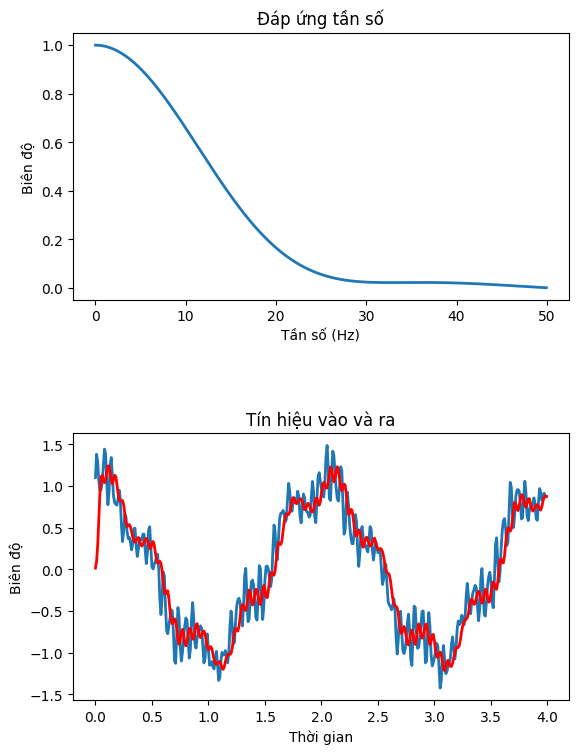

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
nyquistRate = sampleRate/2 #Tần số Nyquist
cutOffFreq = 10 #Hz
N = 8
wC = cutOffFreq/nyquistRate # Tần số cắt chuẩn hóa
b = signal.firwin(N, wC, window="triang")
y = signal.lfilter(b, 1, x)
w, h = signal.freqz(b,1, worN=1024)
plt.subplot(2,1,1)
plt.plot((w/np.pi)*nyquistRate, abs(h), linewidth=2)
plt.title('Đáp ứng tần số')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(2,1,2)
plt.plot(t, x, linewidth=2)
plt.title('Tín hiệu vào và ra')
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.plot(t, y, 'r-', linewidth=2)
plt.subplots_adjust(top=1.5, hspace=0.5)


#### Bài 1b: <br>
Nhận xét tín hiệu vào và tín hiệu ra

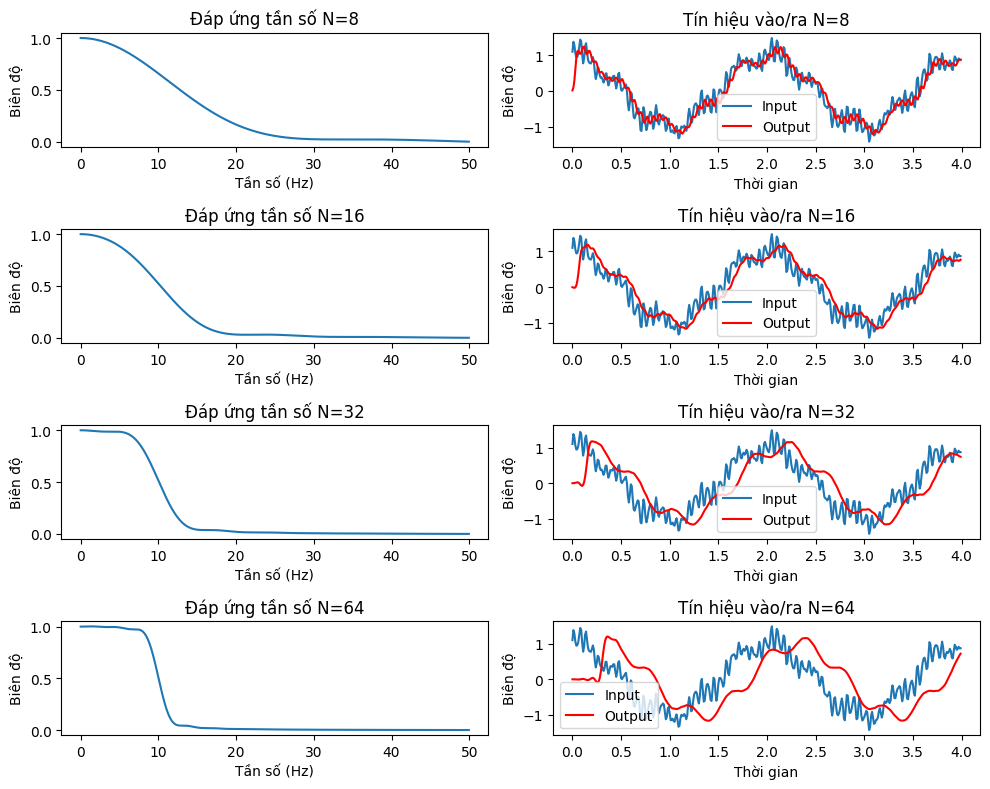

In [ ]:
orders = [8, 16, 32, 64]
plt.figure(figsize=(10, 8))
for i, N in enumerate(orders):
    b = signal.firwin(N, wC, window="triang")
    y = signal.lfilter(b, 1, x)
    w, h = signal.freqz(b,1, worN=1024)
    plt.subplot(len(orders),2,2*i+1)
    plt.plot((w/np.pi)*nyquistRate, abs(h))
    plt.title(f'Đáp ứng tần số N={N}')
    plt.xlabel('Tần số (Hz)')
    plt.ylabel('Biên độ')
    plt.subplot(len(orders),2,2*i+2)
    plt.plot(t, x, label='Input')
    plt.plot(t, y, 'r-', label='Output')
    plt.title(f'Tín hiệu vào/ra N={N}')
    plt.xlabel('Thời gian')
    plt.ylabel('Biên độ')
    plt.legend()
plt.tight_layout()
plt.show()

#### Bài 1c:<br>
Thay đổi bậc lọc từ 8 sang 16, 32, 64. <br>
Nhận xét đáp ứng tần số của bộ lọc và tín hiệu ngõ ra? <br>
Tín hiệu ngõ ra có được lọc hết được các tần số lớn hơn 2.5?

#### Bài 1d: <br>
Thực hiện lại bộ lọc với cửa sổ blackman, hamming, hann

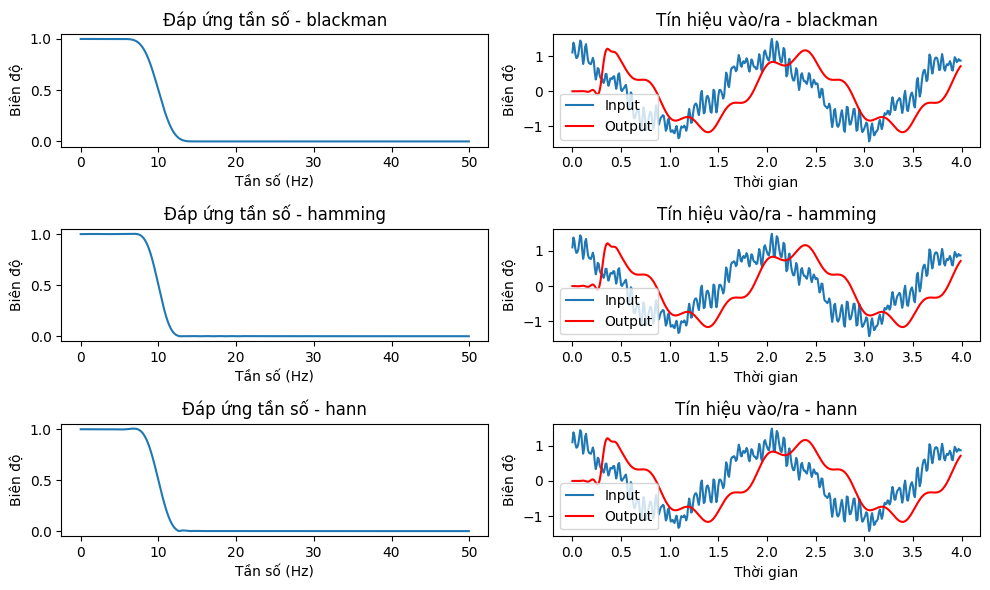

In [ ]:
windows = ['blackman', 'hamming', 'hann']
plt.figure(figsize=(10, 6))
for i, win in enumerate(windows):
    b = signal.firwin(N, wC, window=win)
    y = signal.lfilter(b, 1, x)
    w, h = signal.freqz(b,1, worN=1024)
    plt.subplot(3,2,2*i+1)
    plt.plot((w/np.pi)*nyquistRate, abs(h))
    plt.title(f'Đáp ứng tần số - {win}')
    plt.xlabel('Tần số (Hz)')
    plt.ylabel('Biên độ')
    plt.subplot(3,2,2*i+2)
    plt.plot(t, x, label='Input')
    plt.plot(t, y, 'r-', label='Output')
    plt.title(f'Tín hiệu vào/ra - {win}')
    plt.xlabel('Thời gian')
    plt.ylabel('Biên độ')
    plt.legend()
plt.tight_layout()
plt.show()

#### Bài 1e:  <br>
Đoạn chương trình sau thực hiện lại với cửa số kaiser.

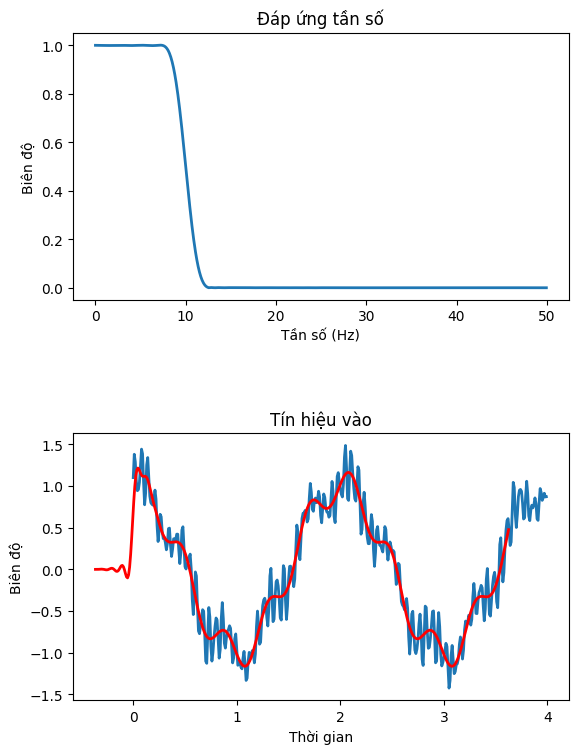

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #KHoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
nyquistRate = sampleRate/2 #Tần số Nyquist
cutOffFreq = 10 #Hz
#Độ rộng chuyển tiếp từ dải thông (passband) sang dải chặn (stopband) là 5Hz
width = 5.0/nyquistRate
rippleInDB = 60 # Độ dợn sóng dải chặn
N, beta = signal.kaiserord(rippleInDB, width)
#----
wC = cutOffFreq/nyquistRate # Tần số cắt
b = signal.firwin(N, wC, window=('kaiser', beta))
y = signal.lfilter(b, 1, x)
w, h = signal.freqz(b,1, worN=1024)

#Độ dịch pha
delay = 0.5 * (N-1) / sampleRate
#Vẽ tín hiệu và đáp ứng
plt.subplot(2,1,1)
plt.plot((w/np.pi)*nyquistRate, abs(h), linewidth=2)
plt.title('Đáp ứng tần số')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(2,1,2)
plt.plot(t, x, linewidth=2)
plt.plot(t -delay, y,  'r-', linewidth=2)
plt.title('Tín hiệu vào')
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.subplots_adjust(top=1.5, hspace=0.5)


#### Bài 2: <br>
Áp dụng cho tín hiệu và bộ lọc ở câu 1 e: <br>
> Vẽ đáp ứng bộ lọc tại subplot(2,1,1). <br>
> Vẽ phổ tín hiệu vào và ra tại subplot(2,1,2) <br>
Nhận xét


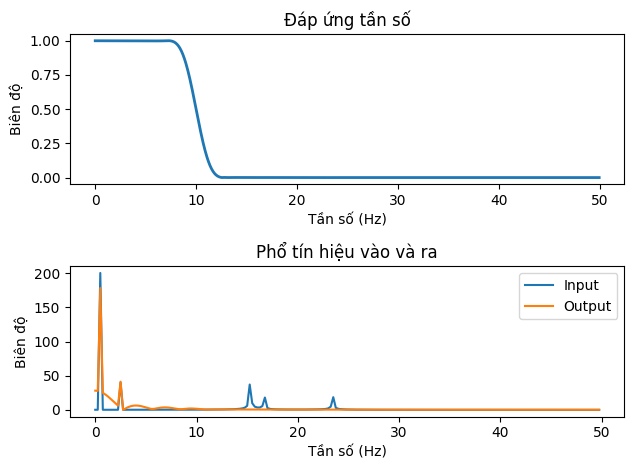

In [ ]:
# Đáp ứng tần số
plt.subplot(2,1,1)
plt.plot((w/np.pi)*nyquistRate, abs(h), linewidth=2)
plt.title('Đáp ứng tần số')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

# Phổ tín hiệu vào và ra
X = np.fft.fft(x)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(x), 1/sampleRate)
plt.subplot(2,1,2)
plt.plot(freqs[:len(freqs)//2], np.abs(X)[:len(X)//2], label='Input')
plt.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2], label='Output')
plt.title('Phổ tín hiệu vào và ra')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.tight_layout()
plt.show()

#### Bài 3a: <br>
[Mẫu]<br>
Đoạn chương trình sau đây thực hiện các bộ lọc với dải thông khác nhau với bậc lọc N = 15, tần số cắt chuẩn hóa $\omega$
1. Lọc cao qua ("stop band" từ 0 đến $\omega$): <br>


[-0.00293555 -0.00631867 -0.0160777  -0.03303718 -0.05499888 -0.07714916
 -0.09364246  0.89770084 -0.09364246 -0.07714916 -0.05499888 -0.03303718
 -0.0160777  -0.00631867 -0.00293555]


Text(0, 0.5, 'Biên độ')

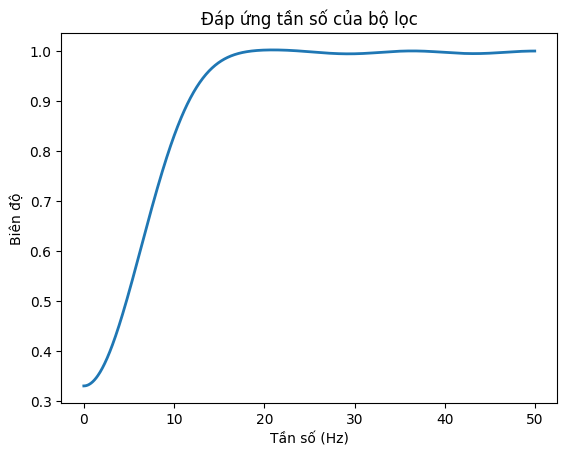

In [ ]:
from scipy import signal
sampleRate = 100 #Tần số lấy mẫu
nyquistRate = sampleRate/2 #Tần số Nyquist
N = 15
wc = 0.1 # w = fc/nyquistRate
b = signal.firwin(N, wc, pass_zero=False) #b là các hệ số lọc
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

2. Lọc dải thông (band pass):

[-2.02441315e-07  2.03442146e-04  3.22270010e-03 -9.22464023e-03
 -1.04454389e-01 -1.42554766e-01  1.76911861e-01  4.54801815e-01
  1.76911861e-01 -1.42554766e-01 -1.04454389e-01 -9.22464023e-03
  3.22270010e-03  2.03442146e-04 -2.02441315e-07]


Text(0, 0.5, 'Biên độ')

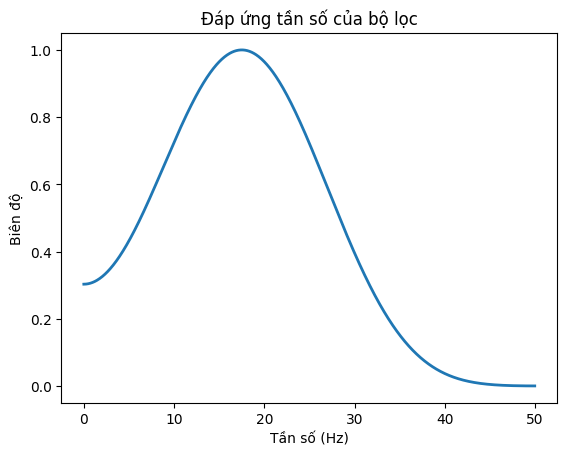

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nyquistRate = sampleRate/2 #Tần số Nyquist
N = 15
w1, w2 = 0.2, 0.5
b = signal.firwin(N, [w1, w2], window = 'blackmanharris', pass_zero=False) #Thêm cửa số
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

3. Lọc dải chặn (band stop):

[ 1.84121573e-04 -4.04871261e-03 -1.66687274e-02  2.11686871e-02
  1.37513294e-01  1.29418821e-01 -1.29506806e-01  7.23878645e-01
 -1.29506806e-01  1.29418821e-01  1.37513294e-01  2.11686871e-02
 -1.66687274e-02 -4.04871261e-03  1.84121573e-04]


Text(0, 0.5, 'Biên độ')

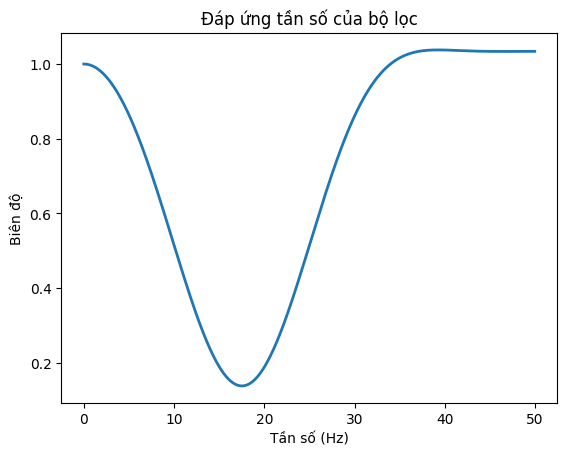

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nyquistRate = sampleRate/2 #Tần số Nyquist
N = 15
w1, w2 = 0.2, 0.5
b = signal.firwin(N, [w1, w2])
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

4. Lọc multi band, dải thông là [0, w1], [w2, w3] và [w4, 1]

[ 0.00594575 -0.01458124 -0.01659233  0.07623798  0.02892033  0.17803264
 -0.01530625  0.51468624 -0.01530625  0.17803264  0.02892033  0.07623798
 -0.01659233 -0.01458124  0.00594575]


Text(0, 0.5, 'Biên độ')

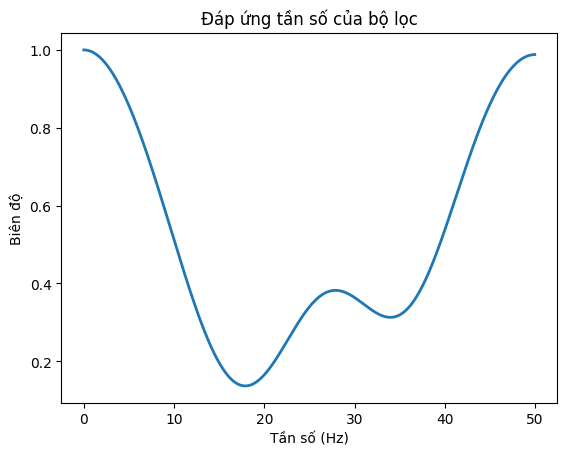

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nyquistRate = sampleRate/2 #Tần số Nyquist
N = 15
w1, w2, w3, w4 = 0.2, 0.5, 0.6, 0.8
b = signal.firwin(N, [w1, w2, w3, w4])
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

5. Lọc multi-band với dải thông [w1, w2] và [w3, w4]

[-0.00666967  0.01635658  0.01861253 -0.08552035 -0.03244152 -0.19970902
  0.01716986  0.57735192  0.01716986 -0.19970902 -0.03244152 -0.08552035
  0.01861253  0.01635658 -0.00666967]


Text(0, 0.5, 'Biên độ')

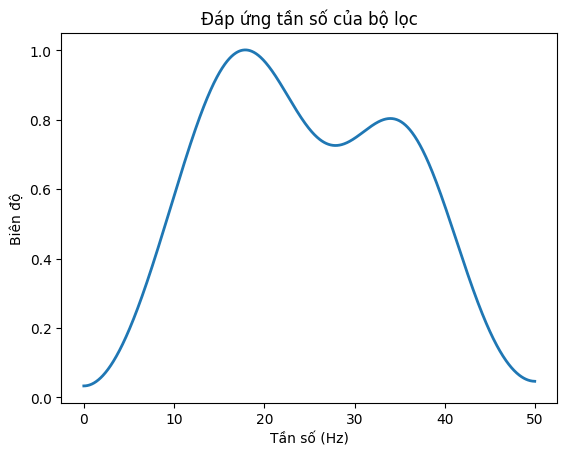

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nyquistRate = sampleRate/2 #Tần số Nyquist
N = 15
w1, w2, w3, w4 = 0.2, 0.5, 0.6, 0.8
b = signal.firwin(N, [w1, w2, w3, w4], pass_zero=False)
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

Bài 3b: <br>
Thực hiện lại bài 3a.2 với bậc lọc bằng 3. Nhận xét và giải thích kết quả

[2.62417806e-05 9.99976173e-01 2.62417806e-05]


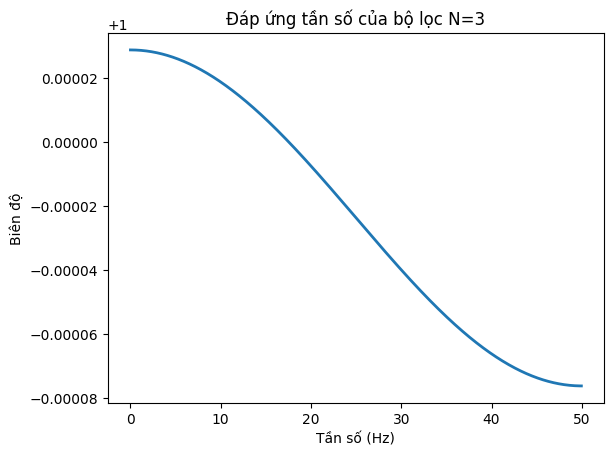

In [ ]:
N = 3
w1, w2 = 0.2, 0.5
b = signal.firwin(N, [w1, w2], window='blackmanharris', pass_zero=False)
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc N=3')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.show()

#### Bài 4: <br>
Cho tín hiệu x<br>
a. Thực hiện mạch lọc loại bỏ tín hiệu 0.5Hz và 2.5Hz <br>
b. Thực hiện mạch lọc chỉ giữ lại tần số 15.3Hz

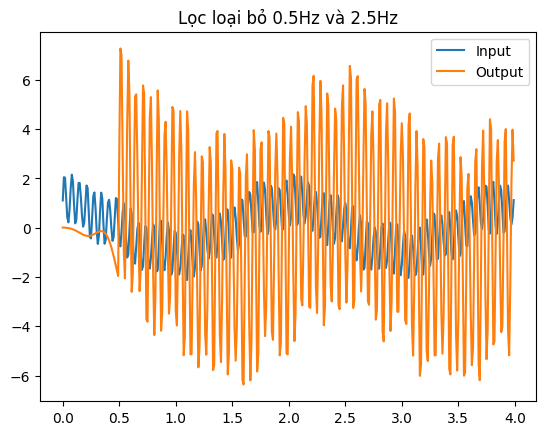

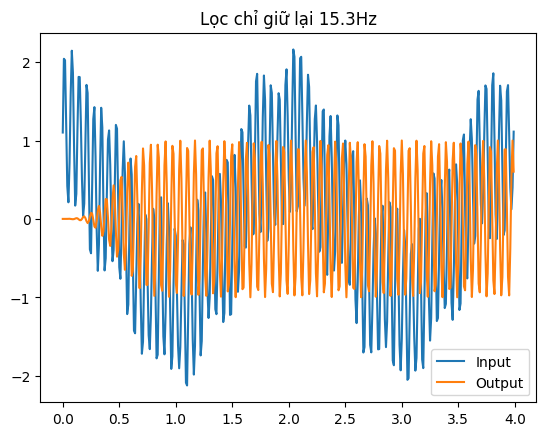

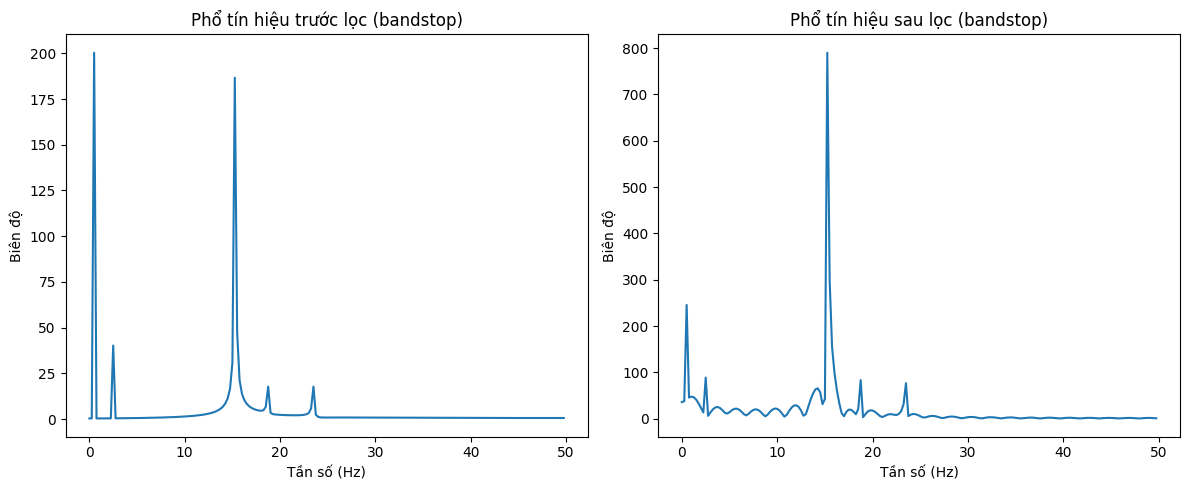

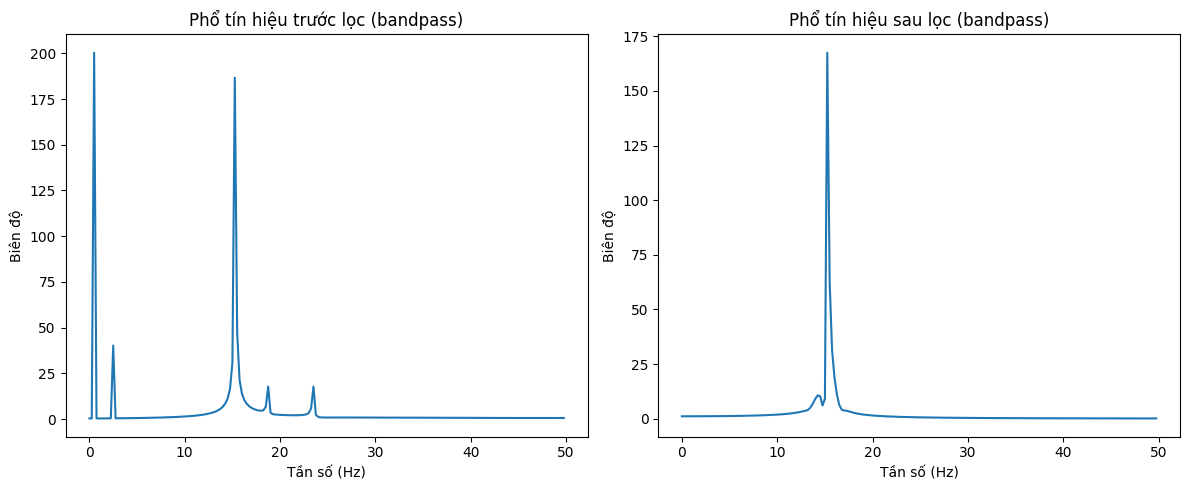

In [27]:
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*18.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
#Viết tiếp chương trình ở đây
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*18.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
# a. Lọc loại bỏ 0.5Hz và 2.5Hz (bandstop)
nyquistRate = sampleRate/2
w1 = 0.5/nyquistRate
w2 = 2.5/nyquistRate
# Đảm bảo giá trị cutoff > 0
cutoffs = [max(w1-0.01, 0.001), w1+0.01, w2-0.01, w2+0.01]
b = signal.firwin(101, cutoffs, pass_zero=True)
y = signal.lfilter(b, 1, x)
plt.plot(t, x, label='Input')
plt.plot(t, y, label='Output')
plt.title('Lọc loại bỏ 0.5Hz và 2.5Hz')
plt.legend()
plt.show()


# b. Lọc chỉ giữ lại 15.3Hz (bandpass)
w3 = 15.3/nyquistRate
b2 = signal.firwin(101, [w3-0.02, w3+0.02], pass_zero=False)
y2 = signal.lfilter(b2, 1, x)
plt.plot(t, x, label='Input')
plt.plot(t, y2, label='Output')
plt.title('Lọc chỉ giữ lại 15.3Hz')
plt.legend()
plt.show()

# Vẽ phổ tín hiệu trước và sau lọc loại bỏ 0.5Hz và 2.5Hz
X = np.fft.fft(x)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(x), 1/sampleRate)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(freqs[:len(freqs)//2], np.abs(X)[:len(X)//2])
plt.title('Phổ tín hiệu trước lọc (bandstop)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(1,2,2)
plt.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2])
plt.title('Phổ tín hiệu sau lọc (bandstop)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.tight_layout()
plt.show()

# Vẽ phổ tín hiệu trước và sau lọc chỉ giữ lại 15.3Hz
Y2 = np.fft.fft(y2)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(freqs[:len(freqs)//2], np.abs(X)[:len(X)//2])
plt.title('Phổ tín hiệu trước lọc (bandpass)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(1,2,2)
plt.plot(freqs[:len(freqs)//2], np.abs(Y2)[:len(Y2)//2])
plt.title('Phổ tín hiệu sau lọc (bandpass)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.tight_layout()
plt.show()

Bài 5: <br>
Cho file âm thanh gốc là "violin_origional.wav'" và file âm thanh gồm nhiễu "violin_noise.wav" <br>
a. Phân tích phổ của 2 file trên<br>
b. Xác định tần số của nhiễu <br>
c. Thiết kế mạch lọc để loại nhiễu trong file "violin_noise.wav"

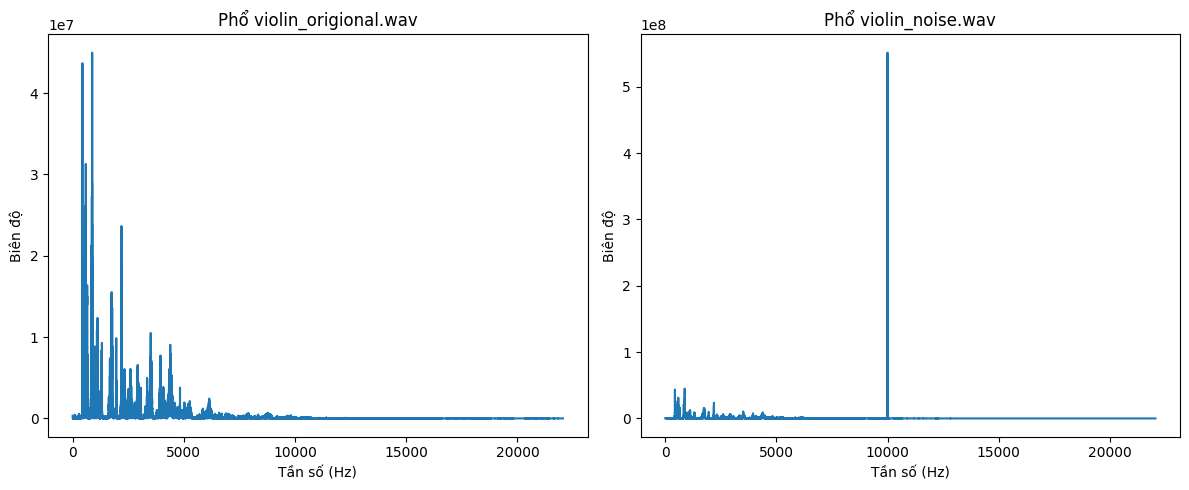

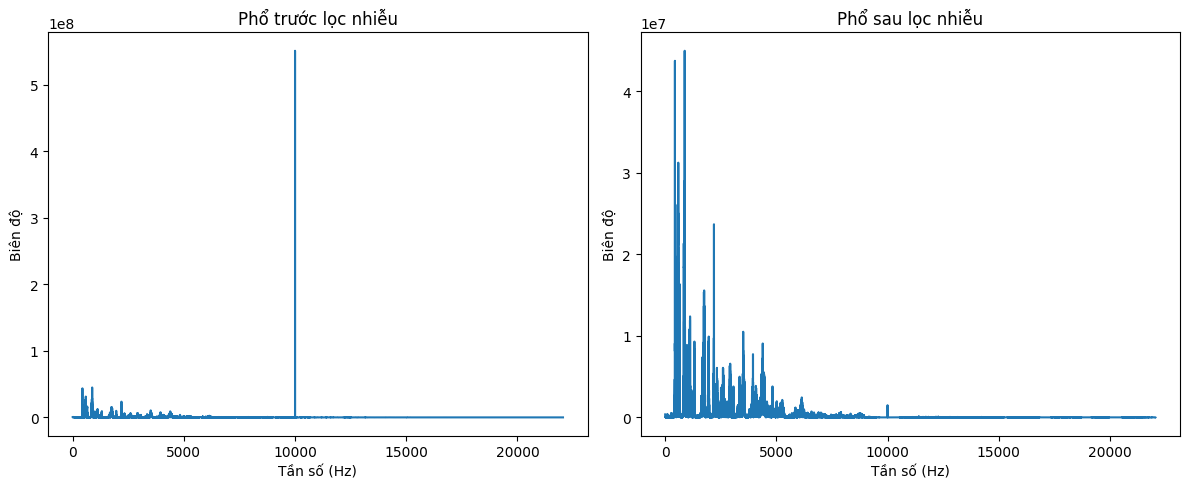

In [26]:
#Thư viện
from scipy.io import wavfile
from scipy import fftpack as fft
from scipy import signal
import IPython.display as ipd #Thêm thư viện để play Audio
# Đọc file
file_name= 'violin_noise.wav'
fs, s = wavfile.read(file_name)
#Sinh viên thêm đoạn code vào đây
#begin
# Phân tích phổ
# Đọc file âm thanh gốc và file có nhiễu
fs1, s1 = wavfile.read('violin_origional.wav')
fs2, s2 = wavfile.read('violin_noise.wav')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
S1 = np.fft.fft(s1)
freqs1 = np.fft.fftfreq(len(s1), 1/fs1)
plt.plot(freqs1[:len(freqs1)//2], np.abs(S1)[:len(S1)//2])
plt.title('Phổ violin_origional.wav')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

plt.subplot(1,2,2)
S2 = np.fft.fft(s2)
freqs2 = np.fft.fftfreq(len(s2), 1/fs2)
plt.plot(freqs2[:len(freqs2)//2], np.abs(S2)[:len(S2)//2])
plt.title('Phổ violin_noise.wav')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.tight_layout()
plt.show()

# Giả sử xác định nhiễu ở 60Hz (bạn xem phổ để xác định chính xác)
noise_freq = 10000
nyquist = fs/2
w1 = (noise_freq-1000)/nyquist
w2 = (noise_freq+1000)/nyquist
b = signal.firwin(101, [w1, w2],pass_zero=True)
y = signal.lfilter(b, 1, s)

Y = np.fft.fft(y)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(freqs[:len(freqs)//2], np.abs(S)[:len(S)//2])
plt.title('Phổ trước lọc nhiễu')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(1,2,2)
plt.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2])
plt.title('Phổ sau lọc nhiễu')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.tight_layout()
plt.show()
#end
#Tạo file wav để nghe lại với y là tín hiệu sau lọc
y_wav = np.array(y, dtype='int16') #Định dạng lại âm thanh 16 bit
wavfile.write("violin_filtered.wav", fs,y_wav)
#ipd.Audio(s, rate=fs)       #Phát Audio